In [1]:
# Required inputs

import numpy as np
import os
from tqdm import tqdm
import random

In [2]:
# Define function to load all npy files in a given directory while preserving the order and return

def load_npy_arrays(directory):

    file_list = [file for file in os.listdir(directory) if file.endswith('.npy')]
    file_list = sorted(file_list, key=lambda x: int(os.path.splitext(x)[0]))

    loaded_arrays = []

    for file in tqdm(file_list):
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        loaded_arrays.append(data)

    return np.vstack(loaded_arrays)

In [3]:
# Load saved emotion scores and W+ latents

emotion_scores = load_npy_arrays('main_emotionscores')

emotion_mapping_8 = {0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}

100%|██████████| 10000/10000 [00:55<00:00, 181.76it/s]


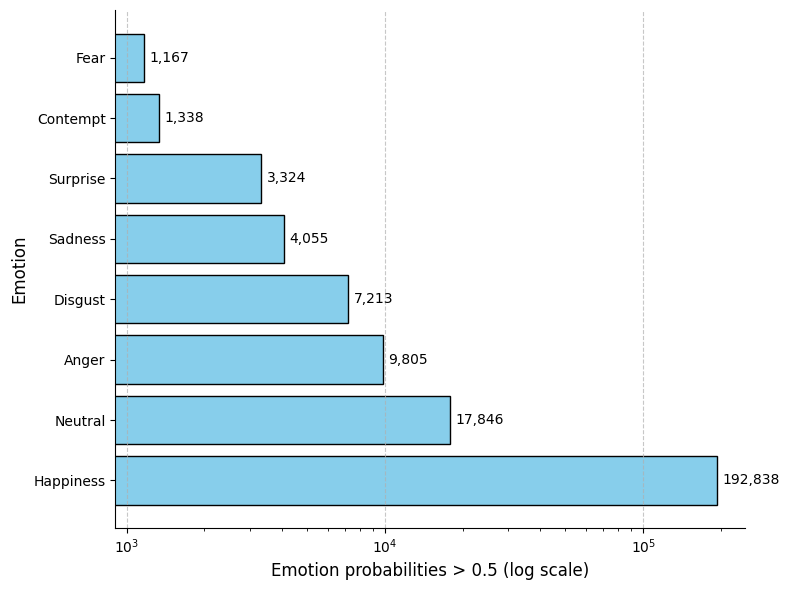

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

column_sums = np.sum(emotion_scores > 0.5, axis=0)

# Sort the emotions by their sum of values
sorted_emotions = [emotion_mapping_8[i] for i in np.argsort(column_sums)]

# Sort the sums accordingly
sorted_sums = np.sort(column_sums)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed

# Plot a horizontal bar chart with logarithmic scale for x-axis
bars = ax.barh(sorted_emotions, sorted_sums, color='skyblue', edgecolor='black')

# Set logarithmic scale for x-axis
ax.set_xscale('log')

# Set labels and title
# ax.set_xlabel('Sum of Values > 0.5 (log scale)', fontsize=12)
ax.set_xlabel('Emotion probabilities > 0.5 (log scale)', fontsize=12)
ax.set_ylabel('Emotion', fontsize=12)
# ax.set_title('Probability Exceeding Threshold (0.5) for Each Emotion', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width * 10.5 / 10, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)),
            va='center', ha='left', fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Invert y-axis to display emotions from top to bottom
ax.invert_yaxis()

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [10]:
# Load up directions

anger_dir = np.load('main_directions/0.npy').astype(np.float32)[0]
contempt_dir = np.load('main_directions/1.npy').astype(np.float32)[0]
disgust_dir = np.load('main_directions/2.npy').astype(np.float32)[0]
fear_dir = np.load('main_directions/3.npy').astype(np.float32)[0]
happiness_dir = np.load('main_directions/4.npy').astype(np.float32)[0]
neutral_dir = np.load('main_directions/5.npy').astype(np.float32)[0]
sadness_dir = np.load('main_directions/6.npy').astype(np.float32)[0]
surprise_dir = np.load('main_directions/7.npy').astype(np.float32)[0]

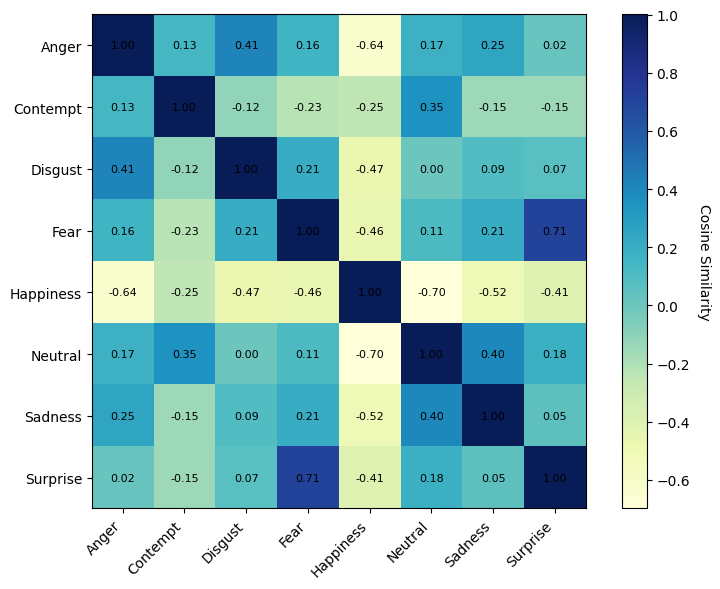

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

emotion_directions = [anger_dir, contempt_dir, disgust_dir, fear_dir,
                      happiness_dir, neutral_dir, sadness_dir, surprise_dir]

similarities = cosine_similarity(emotion_directions)

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(similarities, cmap='YlGnBu')

cbar = plt.colorbar(heatmap)
cbar.set_label('Cosine Similarity', rotation=270, labelpad=15)

emotions = ['Anger', 'Contempt', 'Disgust', 'Fear',
            'Happiness', 'Neutral', 'Sadness', 'Surprise']
ax.set_xticks(np.arange(len(emotions)))
ax.set_yticks(np.arange(len(emotions)))
ax.set_xticklabels(emotions, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(emotions, fontsize=10)

# ax.set_title('Cosine Similarity Between Emotion Directions', fontsize=14)
# ax.set_xlabel('Emotions', fontsize=12)
# ax.set_ylabel('Emotions', fontsize=12)

for i in range(len(emotions)):
    for j in range(len(emotions)):
        text = ax.text(j, i, '{:.2f}'.format(similarities[i, j]),
                       ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()